In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../Dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)

**DBSCAN**

In [4]:
# Dataset Used for DBSCAN Clustering
X = df[['Age', 'Annual Income', 'Spending Score']]

20.248456731316587

<Figure size 360x360 with 0 Axes>

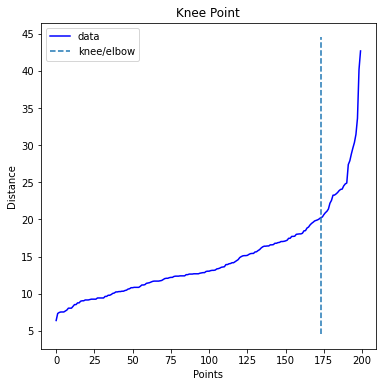

In [5]:
# Finding the Optimal value of EPS
# Sources: 
# [1] https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan
# [2] https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/
nearest_neighbors = NearestNeighbors(n_neighbors=9)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,8], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

distances[knee.knee]

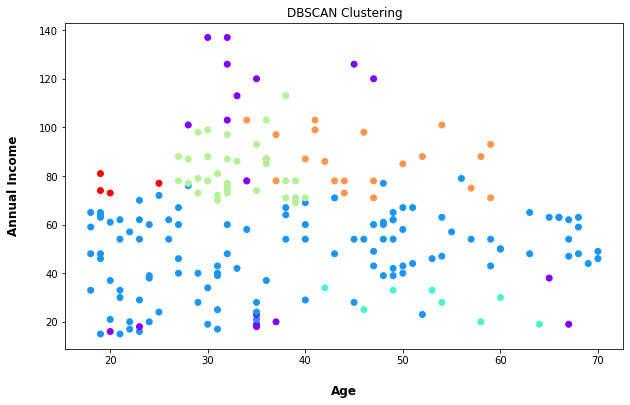

In [6]:
dbscan = DBSCAN(eps=distances[knee.knee]/1.6, min_samples=4, n_jobs=-1).fit(X)

plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['Annual Income'],c=dbscan.labels_,cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('\nAge', fontsize=12, fontweight='bold')
plt.ylabel('Annual Income\n', fontsize=12, fontweight='bold')
plt.show()

In [7]:
df['Cluster'] = dbscan.labels_
df

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [8]:
df.Cluster.value_counts()

 0    113
 2     34
 3     23
-1     18
 1      8
 4      4
Name: Cluster, dtype: int64

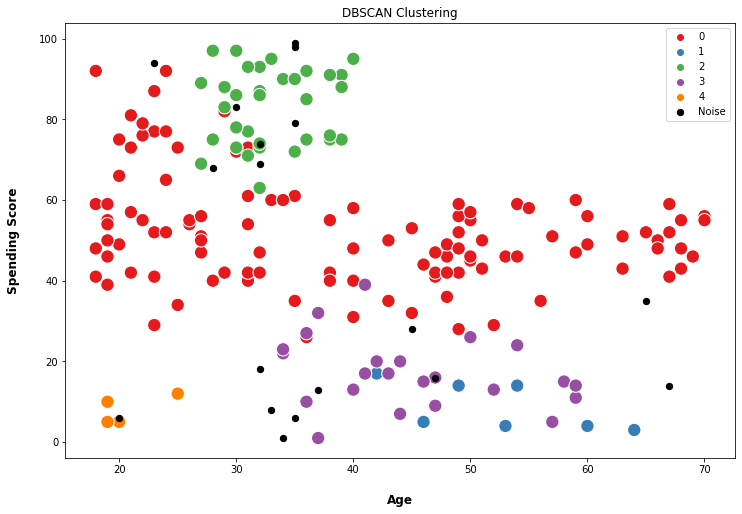

In [9]:
Noise = df[df['Cluster']==-1]

plt.subplots(figsize=(12,8))

sns.scatterplot('Age', 'Spending Score', data=df[df['Cluster']!=-1], hue='Cluster', palette='Set1', s=180)
plt.scatter(Noise['Age'], Noise['Spending Score'], s=40, label='Noise', c="black", marker='o')

plt.title('DBSCAN Clustering')
plt.xlabel('\nAge', fontsize=12, fontweight='bold')
plt.ylabel('Spending Score\n', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

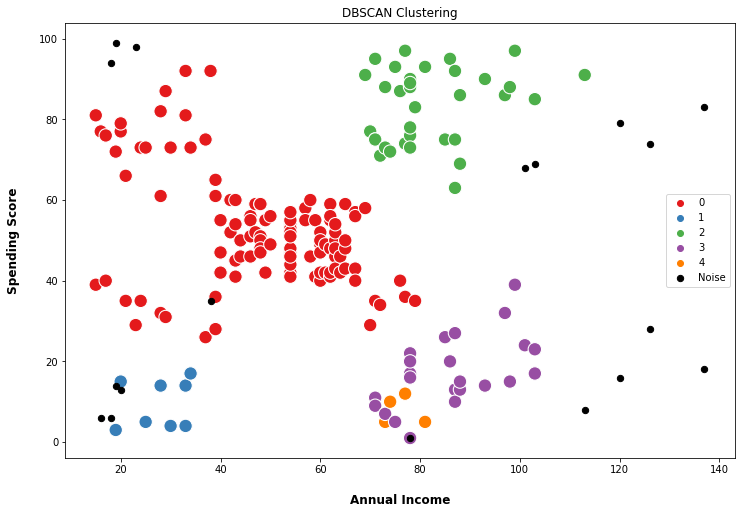

In [10]:
plt.subplots(figsize=(12,8))

sns.scatterplot('Annual Income', 'Spending Score', data=df[df['Cluster']!=-1], hue='Cluster', palette='Set1', s=180)
plt.scatter(Noise['Annual Income'], Noise['Spending Score'], s=40, label='Noise', c="black", marker='o')

plt.title('DBSCAN Clustering')
plt.xlabel('\nAnnual Income', fontsize=12, fontweight='bold')
plt.ylabel('Spending Score\n', fontsize=12, fontweight='bold')

plt.legend()
plt.show()